In [1]:
#carregamento das bibliotecas

#manipulação de dados
import pandas as pd
import numpy as np

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#processamento dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#modelagem
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#preparação do dataset para processamento do modelo
from sklearn.model_selection import train_test_split

#validação do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import collections

In [2]:
#carregando os dados sets, necessários para o treinamento
df_info = pd.read_csv('dataset/gender_submission.csv')
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [3]:
#leitura do arquivo
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Leitura da estrutura do arquivo de treino', df_train.shape,'\n','Leitura da estrutura do arquivo de teste', df_test.shape)

Leitura da estrutura do arquivo de treino (891, 12) 
 Leitura da estrutura do arquivo de teste (418, 11)


# Analise Exploratori

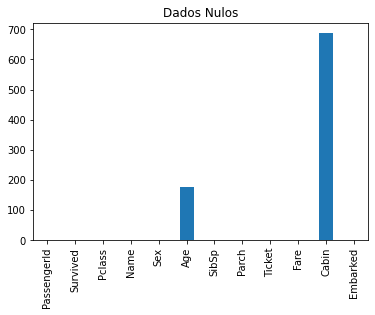

In [5]:
#avaliando dados nulos no dataset
df_train.isna().sum().plot(kind='bar', title='Dados Nulos')

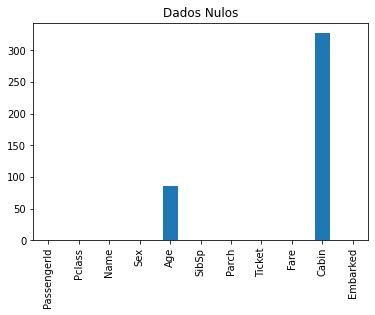

In [6]:
#avaliando dados nulos no dataset
df_test.isna().sum().plot(kind='bar', title='Dados Nulos')

In [7]:
#avaliar a incidencia de sobrevivente, sobre as features
def bar_chart(feature, df, title):
    survived=df[df['Survived']==1][feature].value_counts()
    dead=df[df['Survived']==0][feature].value_counts()
    df_g=pd.DataFrame([survived,dead])
    df_g.index=['survived','dead']
    df_g.plot(kind='bar',stacked=True, figsize=(10,5), title=title)

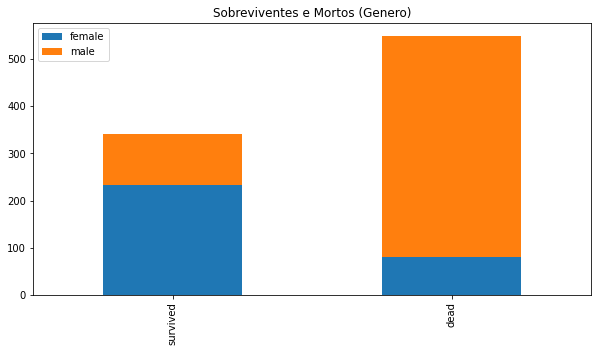

In [8]:
bar_chart('Sex', df_train, 'Sobreviventes e Mortos (Genero)')

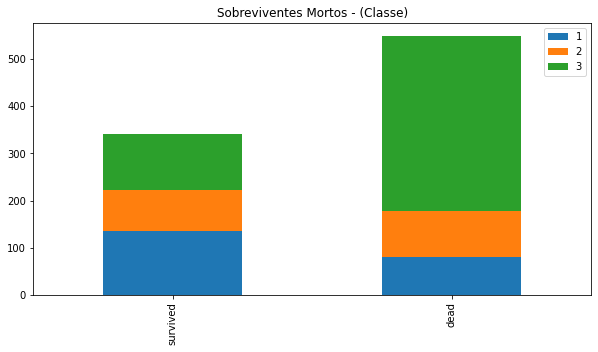

In [9]:
bar_chart('Pclass', df_train, 'Sobreviventes Mortos - (Classe)')

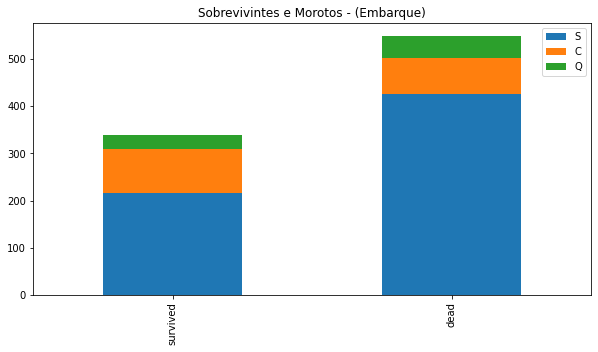

In [10]:
bar_chart('Embarked', df_train, 'Sobrevivintes e Morotos - (Embarque)')

# Preparando o dataset

In [11]:
# tratamento do dataset, com nulos
df_train['Age'] = df_train['Age'].fillna(round(df_train['Age'].mean(),2))
df_train['Sex']= df_train['Sex'].map({'male':1, 'female':0})
df_train['Embarked'].fillna(value='S',inplace=True)
df_train['Embarked'] = df_train['Embarked'].replace(['S','Q','C'],[1,2,3])

In [12]:
df_train_novo = df_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [13]:
df_train_novo.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,3
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [14]:
target = df_train_novo['Survived']

In [15]:
features = df_train_novo.drop('Survived', axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

# Modelagem

In [17]:
#Modelo SVM
svm = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

svm_acuracia = round(accuracy_score(y_test, y_pred),2) * 100

print('Acuracia do Modelo', round(accuracy_score(y_test, y_pred),2))
print('Predição do Modelo', round(precision_score(y_test, y_pred),2))
print('Recall   do Modelo', round(recall_score(y_test, y_pred),2))
print('F1       do Modelo', round(f1_score(y_test, y_pred),2))

Acuracia do Modelo 0.8
Predição do Modelo 0.78
Recall   do Modelo 0.7
F1       do Modelo 0.74


In [18]:
randomForest = RandomForestClassifier(max_depth=3, random_state=0)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

randomForest_acuracia = round(accuracy_score(y_test, y_pred),2) * 100

print('Acuracia do Modelo', round(accuracy_score(y_test, y_pred),2))
print('Predição do Modelo', round(precision_score(y_test, y_pred),2))
print('Recall   do Modelo', round(recall_score(y_test, y_pred),2))
print('F1       do Modelo', round(f1_score(y_test, y_pred),2))

Acuracia do Modelo 0.83
Predição do Modelo 0.88
Recall   do Modelo 0.67
F1       do Modelo 0.76


In [19]:
LR=LogisticRegression(penalty='l2')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

logistic_acuracia = round(accuracy_score(y_test, y_pred),2) * 100

print('Valor do r quadrado', round(r2_score(y_test, y_pred), 2))

print('Acuracia do Modelo', round(accuracy_score(y_test, y_pred),2))
print('Predição do Modelo', round(precision_score(y_test, y_pred),2))
print('Recall   do Modelo', round(recall_score(y_test, y_pred),2))
print('F1       do Modelo', round(f1_score(y_test, y_pred),2))

Valor do r quadrado 0.26
Acuracia do Modelo 0.82
Predição do Modelo 0.8
Recall   do Modelo 0.74
F1       do Modelo 0.77


/Users/thiagorolemberg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Resultados das Acuracias, dos modelos

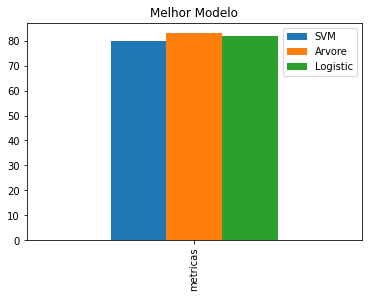

In [20]:
acuracias_dict = {'SVM': svm_acuracia, 'Arvore': randomForest_acuracia, 'Logistic':logistic_acuracia}
df_metricas = pd.DataFrame(data=acuracias_dict, index=['metricas'])
df_metricas.plot(kind='bar', title='Melhor Modelo')

# Validação do modelo

In [21]:
df_test['Age'] = df_test['Age'].fillna(round(df_train['Age'].mean(),2))
df_test['Sex']= df_test['Sex'].map({'male':1, 'female':0})
df_test['Embarked'].fillna(value='S',inplace=True)
df_test['Embarked'] = df_test['Embarked'].replace(['S','Q','C'],[1,2,3])

test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

test['Fare'].fillna(test['Fare'].mean(),inplace=True)

def test_(df,test, modelo, nome_arquivo_saida):
    result_test = modelo.predict(test)
    df['Survived'] = result_test
    print('Resultado da execução', collections.Counter(result_test))
    df[['PassengerId', 'Survived']].to_csv(nome_arquivo_saida)
    
test_(df_test, test, randomForest, 'Pipeline_result.csv')

Resultado da execução Counter({0: 291, 1: 127})


/Users/thiagorolemberg/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
df_test[['PassengerId', 'Survived']].to_csv('Pipeline_result.csv', index=False)

In [29]:
def test_(df,test, modelo, nome_arquivo_saida):
    result_test = modelo.predict(test)
    df['Survived'] = result_test
    print('Resultado da execução', collections.Counter(result_test))
    df[['PassengerId', 'Survived']].to_csv(nome_arquivo_saida, index=False)
    
test_(df_test, test, randomForest, 'Pipeline_result.csv')

Resultado da execução Counter({0: 291, 1: 127})
